## ライブラリのインポートとデータの確認

In [1]:
# ライブラリのインポート
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# アヤメデータのロード
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [56]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [55]:
#print(iris.DESCR)

```python
""" iris.DESCR 出力結果

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988
 
 ・・・（略）
 """
```

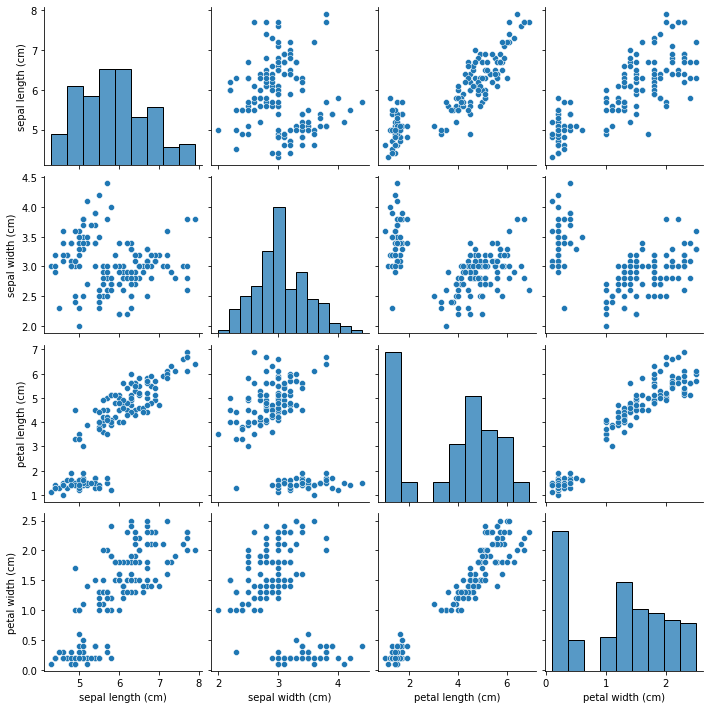

In [3]:
# 説明変数の相関確認
sns.pairplot(df)

## 標準化

In [4]:
# 標準化
sc = StandardScaler()

dfsc = pd.DataFrame(sc.fit_transform(df.values), columns=iris.feature_names)

# 標準化後のデータ確認（平均0、分散1）
round(dfsc.describe(),2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.43,-1.57,-1.45
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.13,0.34,0.13
75%,0.67,0.56,0.76,0.79
max,2.49,3.09,1.79,1.71


In [41]:
# 参考：StandardScalerを使用しない場合の標準化 
dfs = df.apply(lambda x: (x-x.mean())/x.std(), axis=0) 
round(dfs.describe(),2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.86,-2.43,-1.56,-1.44
25%,-0.90,-0.59,-1.22,-1.18
50%,-0.05,-0.13,0.34,0.13
75%,0.67,0.56,0.76,0.79
max,2.48,3.08,1.78,1.71


## 主成分分析

In [43]:
# 主成分分析
pca = PCA(n_components=2)
pca.fit(dfsc)

# 寄与率と因子負荷量
print("寄与率:", pca.explained_variance_ratio_)
print("累積寄与率:", np.cumsum(pca.explained_variance_ratio_))
print("\n因子負荷量（固有ベクトル）")
df_pca = pd.DataFrame(pca.components_, columns=iris.feature_names, index=["PC{}".format(i) for i in range(1,3)])
df_pca

寄与率: [0.72962445 0.22850762]
累積寄与率: [0.72962445 0.95813207]

因子負荷量（固有ベクトル）


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942


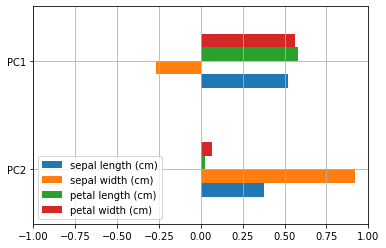

In [44]:
df_pca.sort_index(ascending=False).plot.barh()
plt.xlim(-1,1)
plt.grid()

寄与率
* 各変数の重要性、各主成分によって説明できるデータの割合
* すべての主成分寄与率を足し合わせると1.0

<font color="red">主成分2つで96％が説明できる</font>

因子負荷量
* 各変数の各主成分への影響力（各主成分の意味を推定する）

第1主成分：萼片の長さ・花弁の長さと幅は同程度プラス方向、萼片の幅はマイナス方向<br>
>萼の長さと花弁の全体的な大きさでアヤメの花が特徴づけられている

第2主成分：萼片の幅が大きなプラス要素
>萼の幅でほとんど特徴が決まっている


<font color="red"></font>
>sepal length (cm)：萼片の長さ<br>
>sepal width (cm)：萼片の幅<br>
>petal length (cm)：花びらの長さ<br>
>petal width (cm)：花びらの幅<br>

In [9]:
# データを主成分空間に写像
feature = pca.transform(dfsc)

# 主成分得点
test_data = pd.DataFrame(feature, columns=["PC{}".format(x+1) for x in range(2)])
test_data

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [45]:
# 正解ラベル
y = pd.Series(iris.target, name="y")

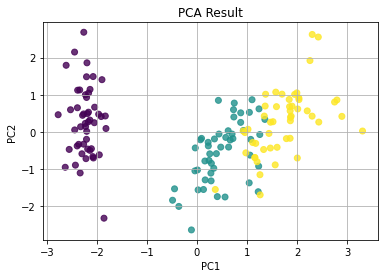

In [46]:
# 第一主成分と第二主成分でプロット
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=y)#list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Result")
plt.show()

## ロジスティック回帰による分類

In [11]:
from sklearn.linear_model import LogisticRegression

# 主成分分析によるデータをテストサイズ0.3で分割し、分類
X, y = feature, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LogisticRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

# ラベルの比較
print("y_test=正解ラベル:", y_test)
print("pred=予測ラベル:", pred)

# 正解率
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

y_test: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
pred: [2 1 0 2 0 2 0 2 2 1 2 1 1 2 1 0 1 1 0 0 1 1 0 0 2 0 0 1 1 0 2 1 0 1 2 1 0
 2 1 1 2 0 2 0 0]
0.9238095238095239
0.8666666666666667


In [12]:
# 主成分1・2に対する、正解ラベルと予測ラベル
lr_df = pd.DataFrame(X_test, columns=["PC1", "PC2"])
lr_df["true"] = y_test
lr_df["pred"] = pred
lr_df.head()

,PC1,PC2,true,pred
0,1.467645,-0.442272,2,2
1,0.562108,-1.764724,1,1
2,-2.446177,2.150728,0,0
3,2.302439,0.420066,2,2
4,-2.232847,0.223148,0,0


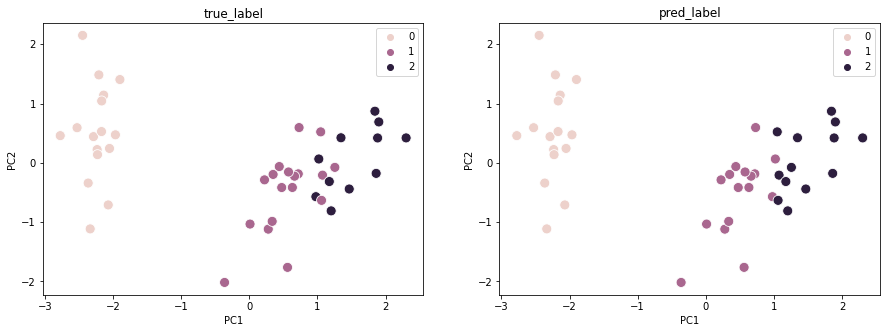

In [57]:
# 比較
labels = iris.target_names

fig = plt.figure(figsize=(15,5))

# 正解ラベルの散布図
fig.add_subplot(121)
sns.scatterplot(x="PC1", y="PC2", s=100, hue="true", data=lr_df)
plt.legend()
plt.title("true_label")

# 予測ラベルの散布図
fig.add_subplot(122)
sns.scatterplot(x="PC1", y="PC2", s=100, hue="pred", data=lr_df)
plt.legend()
plt.title("pred_label")

plt.show()

In [40]:
# 標準化しないデータで分類
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr2 = LogisticRegression()
lr2.fit(X_train, y_train)
pred = lr2.predict(X_test)

# 正解率
print(lr2.score(X_train, y_train))
print(lr2.score(X_test, y_test))

0.9809523809523809
0.9777777777777777
